In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../268_measurements.csv')
print(df.head())

     period.datetimeFrom.utc      period.datetimeTo.utc  value
0  2016-01-29 06:00:00+00:00  2016-01-30 06:00:00+00:00  15.70
1  2016-01-30 06:00:00+00:00  2016-01-31 06:00:00+00:00   9.45
2  2016-01-31 06:00:00+00:00  2016-02-01 06:00:00+00:00  14.90
3  2016-02-01 06:00:00+00:00  2016-02-02 06:00:00+00:00  16.50
4  2016-02-02 06:00:00+00:00  2016-02-03 06:00:00+00:00  19.40


In [3]:
df["time_from"] = pd.to_datetime(df["period.datetimeFrom.utc"])
df["time_to"] = pd.to_datetime(df["period.datetimeTo.utc"])
df["value"] = pd.to_numeric(df["value"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period.datetimeFrom.utc  1435 non-null   object             
 1   period.datetimeTo.utc    1435 non-null   object             
 2   value                    1435 non-null   float64            
 3   time_from                1435 non-null   datetime64[ns, UTC]
 4   time_to                  1435 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(1), object(2)
memory usage: 56.2+ KB


In [5]:
df = df.drop(columns=["period.datetimeFrom.utc", "period.datetimeTo.utc"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   value      1435 non-null   float64            
 1   time_from  1435 non-null   datetime64[ns, UTC]
 2   time_to    1435 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(1)
memory usage: 33.8 KB


In [7]:
df = df[['time_from', 'time_to', 'value']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   time_from  1435 non-null   datetime64[ns, UTC]
 1   time_to    1435 non-null   datetime64[ns, UTC]
 2   value      1435 non-null   float64            
dtypes: datetime64[ns, UTC](2), float64(1)
memory usage: 33.8 KB


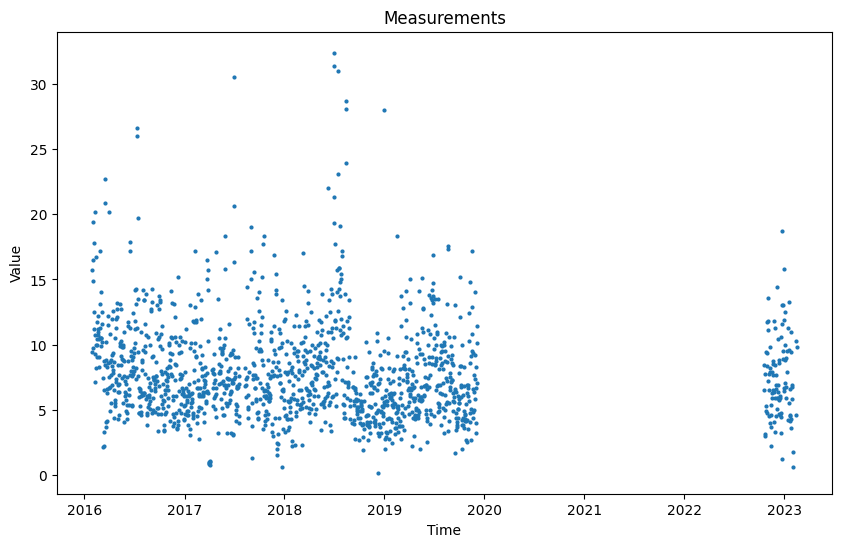

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['time_from'], df['value'], 'o', markersize=2)
plt.title('Measurements')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
df["value"] = scaler.fit_transform(df["value"].values.reshape(-1, 1))

In [17]:
df["value"]

0       0.481962
1       0.288085
2       0.457146
3       0.506778
4       0.596737
          ...   
1430    0.048919
1431    0.013556
1432    0.137637
1433    0.314452
1434    0.300183
Name: value, Length: 1435, dtype: float64

In [18]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    times = []

    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        time_ = df['time_from'][i + seq_length]
        xs.append(x)
        ys.append(y)
        times.append(time_)
    
    return np.array(xs), np.array(ys), np.array(times)

In [19]:
sequence_length = 10
X, y, time_sequences = create_sequences(df['value'], sequence_length)

In [20]:
X

array([[0.48196172, 0.28808512, 0.45714552, ..., 0.54710426, 0.34237057,
        0.62155287],
       [0.28808512, 0.45714552, 0.50677793, ..., 0.34237057, 0.62155287,
        0.32686044],
       [0.45714552, 0.50677793, 0.59673667, ..., 0.62155287, 0.32686044,
        0.21642833],
       ...,
       [0.19967739, 0.12305736, 0.1280206 , ..., 0.20836306, 0.20308962,
        0.04891894],
       [0.12305736, 0.1280206 , 0.10692682, ..., 0.20308962, 0.04891894,
        0.01355585],
       [0.1280206 , 0.10692682, 0.28715451, ..., 0.04891894, 0.01355585,
        0.13763688]])

In [21]:
y

array([0.32686044, 0.21642833, 0.28250147, ..., 0.01355585, 0.13763688,
       0.31445234])

In [22]:
X = X.reshape(X.shape[0], X.shape[1], 1)
X

array([[[0.48196172],
        [0.28808512],
        [0.45714552],
        ...,
        [0.54710426],
        [0.34237057],
        [0.62155287]],

       [[0.28808512],
        [0.45714552],
        [0.50677793],
        ...,
        [0.34237057],
        [0.62155287],
        [0.32686044]],

       [[0.45714552],
        [0.50677793],
        [0.59673667],
        ...,
        [0.62155287],
        [0.32686044],
        [0.21642833]],

       ...,

       [[0.19967739],
        [0.12305736],
        [0.1280206 ],
        ...,
        [0.20836306],
        [0.20308962],
        [0.04891894]],

       [[0.12305736],
        [0.1280206 ],
        [0.10692682],
        ...,
        [0.20308962],
        [0.04891894],
        [0.01355585]],

       [[0.1280206 ],
        [0.10692682],
        [0.28715451],
        ...,
        [0.04891894],
        [0.01355585],
        [0.13763688]]])

In [23]:
time_sequences = pd.to_datetime(time_sequences)
time_sequences

DatetimeIndex(['2016-02-08 06:00:00+00:00', '2016-02-09 06:00:00+00:00',
               '2016-02-10 06:00:00+00:00', '2016-02-11 06:00:00+00:00',
               '2016-02-12 06:00:00+00:00', '2016-02-13 06:00:00+00:00',
               '2016-02-14 06:00:00+00:00', '2016-02-15 06:00:00+00:00',
               '2016-02-16 06:00:00+00:00', '2016-02-17 06:00:00+00:00',
               ...
               '2023-01-25 06:00:00+00:00', '2023-01-26 06:00:00+00:00',
               '2023-01-27 06:00:00+00:00', '2023-01-28 06:00:00+00:00',
               '2023-01-29 06:00:00+00:00', '2023-01-30 06:00:00+00:00',
               '2023-01-31 06:00:00+00:00', '2023-02-01 06:00:00+00:00',
               '2023-02-13 06:00:00+00:00', '2023-02-14 06:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1424, freq=None)

In [24]:
X_train = X[time_sequences < '2021-01-01']
y_train = y[time_sequences < '2021-01-01']

X_test = X[time_sequences >= '2021-01-01']
y_test = y[time_sequences >= '2021-01-01']

In [25]:
from tensorflow import keras

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

In [32]:
model = Sequential()
model.add(Input(shape=(sequence_length, 1)))
model.add(LSTM(128, activation="relu", return_sequences=True))
model.add(LSTM(64, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    shuffle=False,
    verbose=1,
    validation_data=(X_test, y_test),
)

Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0408 - val_loss: 0.0100
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - val_loss: 0.0102
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - val_loss: 0.0102
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - val_loss: 0.0102
Epoch 5/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0141 - val_loss: 0.0101
Epoch 6/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - val_loss: 0.0101
Epoch 7/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - val_loss: 0.0101
Epoch 8/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - val_loss: 0.0100
Epoch 9/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - val_loss: 0.0100
Epoch 10/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - val_loss: 0.0101
Epoch 11/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - val_loss: 0.0099
Epoch 12/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0

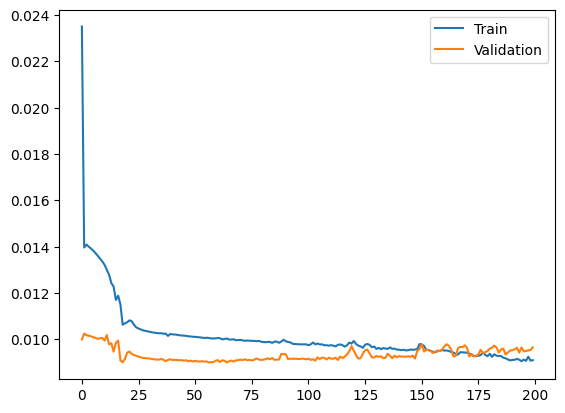

In [33]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.legend()
plt.show()